# Example Peak Utils

example on 1D data e.g. MCP trace

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import peakutils



## Create data

three Gaussians with additional noise on top

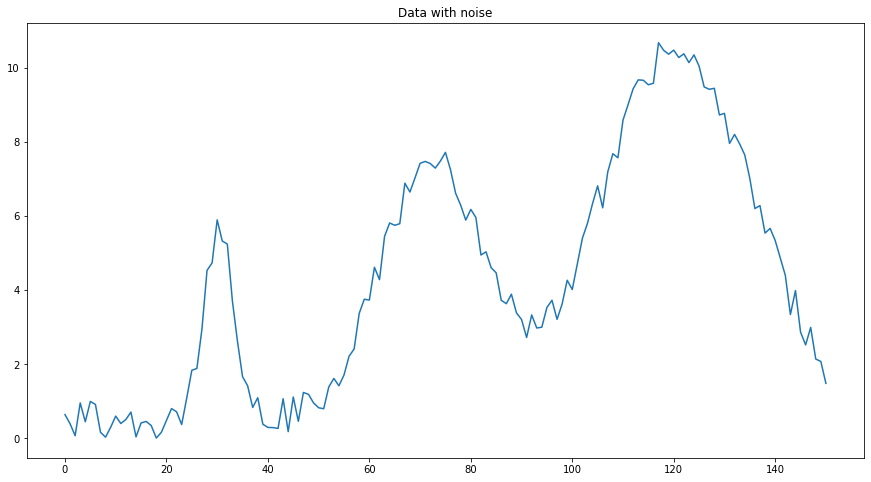

In [2]:
centers = (30.5, 72.3, 120.7)

x = np.linspace(0, 150, 151)

noise = np.random.rand(x.size)
peak_1 = peakutils.gaussian(x, 5, centers[0], 3)
peak_2 = peakutils.gaussian(x, 7, centers[1], 10)
peak_3 = peakutils.gaussian(x, 10, centers[2], 15)
y = peak_1 + peak_2 + peak_3 + noise

plt.figure(figsize=(15,8))
plt.title("Data with noise")
plt.plot(x, y);

## Getting peak estimate

peakutils.Indexes gives us (roughly) nearest index

x 	 y
30 	 5.893725335544334
75 	 7.712973835887135
117 	 10.669909819037752


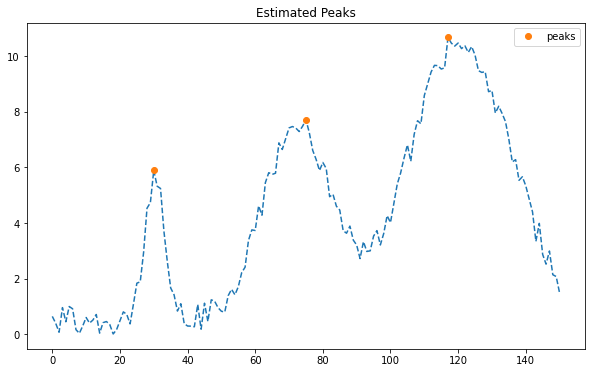

In [3]:
indexes = peakutils.indexes(y, thres=0.3, min_dist=30)

plt.figure(figsize=(10,6))
plt.plot(x,y,'--')
plt.plot(indexes, y[indexes], 'o',label='peaks')
plt.legend()
plt.title('Estimated Peaks')

print(f"x \t y")
for i in range(3):
    print(f"{indexes[i]} \t {y[indexes][i]}")

## Better peak estimate by interpolation

In [4]:
peaks_x = peakutils.interpolate(x, y, ind=indexes)

print(f"indexes \t fits \t \t real")
for i in range(3):
    print(f"{indexes[i]} \t {peaks_x[i]} \t {centers[i]}")

indexes 	 fits 	 	 real
30 	 30.323907673379846 	 30.5
75 	 72.78125942277921 	 72.3
117 	 119.97298569087431 	 120.7


## Add baseline

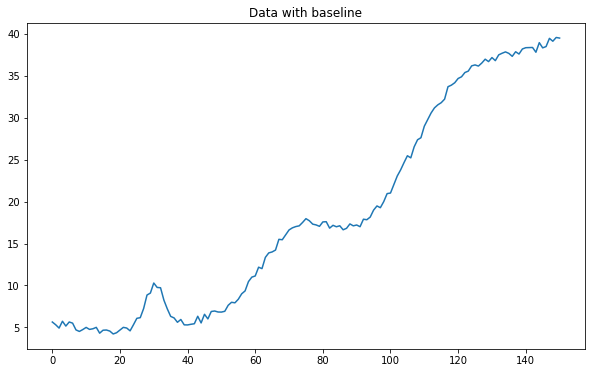

In [5]:
y2 = y + np.polyval([0.002,-0.08,5], x)

plt.figure(figsize=(10,6))
plt.plot(x, y2)
plt.title("Data with baseline");

## Remove baseline

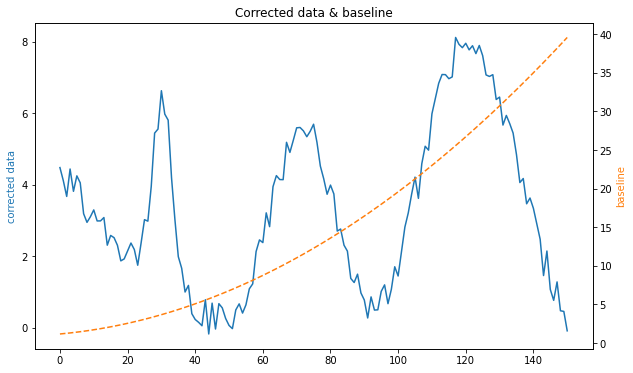

In [6]:
baseline = peakutils.baseline(y2, deg=2)


fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.plot(x,y2-baseline, color=color)
ax1.set_ylabel('corrected data', color=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.plot(x, baseline, '--', color=color)
ax2.set_ylabel('baseline', color=color)  
plt.title("Corrected data & baseline");
